In [1]:
import os
from pathlib import Path

# Set working directory to project root if running from 'notebooks/'
notebook_dir = Path().resolve()
project_root = notebook_dir.parent  # Assumes notebook is inside 'notebooks/'

os.chdir(project_root)
print(f"✅ Working directory set to: {project_root}")

✅ Working directory set to: F:\JCMDataCenter\Proyectos\Football_analysis


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [4]:
import pandas as pd

# Load cleaned matchlogs
df = pd.read_csv("data/processed/cleaned_matchlogs.csv")
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# Define player IDs
id_ekitike = "5b92d896"
id_gyokeres = "4d5a9185"

# Filter each player
df_ekitike = df[df["Player_ID"] == id_ekitike].copy()
df_gyokeres = df[df["Player_ID"] == id_gyokeres].copy()

# Filter by real 2024–25 season ranges
df_ekitike = df_ekitike[(df_ekitike["Date"] >= "2024-08-19") & (df_ekitike["Date"] <= "2025-05-17")].copy()
df_gyokeres = df_gyokeres[(df_gyokeres["Date"] >= "2024-08-09") & (df_gyokeres["Date"] <= "2025-05-17")].copy()

,Month,Ekitike_G+A,Gyokeres_G+A
0,2024-08,5,8
1,2024-09,3,9
2,2024-10,2,6
3,2024-11,4,13
4,2024-12,3,3
5,2025-01,5,6
6,2025-02,1,2
7,2025-03,4,9
8,2025-04,5,8
9,2025-05,2,2


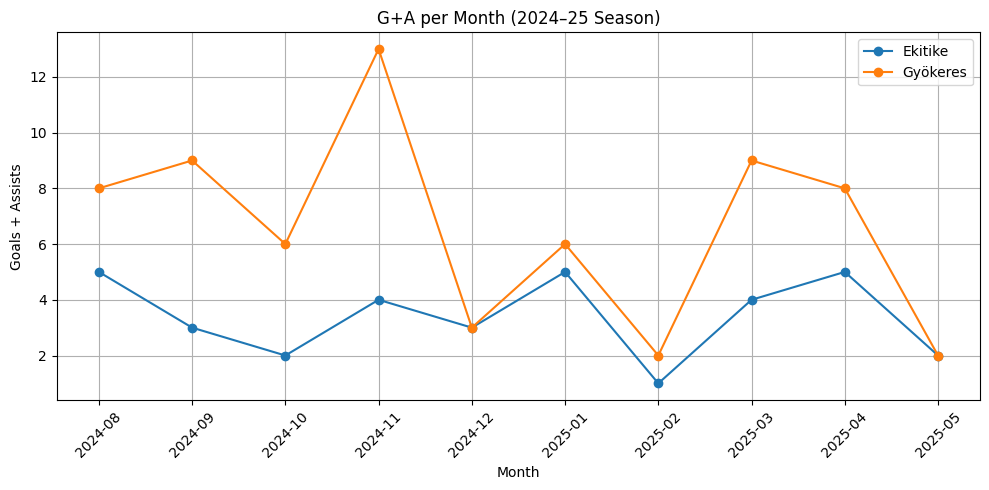

In [7]:
# Add total G+A to each DataFrame
df_ekitike["G+A"] = df_ekitike["Goals"] + df_ekitike["Assists"]
df_gyokeres["G+A"] = df_gyokeres["Goals"] + df_gyokeres["Assists"]

# Add month column for grouping
df_ekitike["Month"] = df_ekitike["Date"].dt.to_period("M").astype(str)
df_gyokeres["Month"] = df_gyokeres["Date"].dt.to_period("M").astype(str)

# Group by month and sum G+A
ekitike_monthly = df_ekitike.groupby("Month")["G+A"].sum().reset_index(name="Ekitike_G+A")
gyokeres_monthly = df_gyokeres.groupby("Month")["G+A"].sum().reset_index(name="Gyokeres_G+A")

# Merge both tables
monthly_comparison = pd.merge(
    ekitike_monthly, gyokeres_monthly,
    on="Month", how="outer"
).fillna(0).sort_values("Month")

# Display the comparative DataFrame
import pandas as pd
import IPython.display as display
display.display(monthly_comparison)

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(monthly_comparison["Month"], monthly_comparison["Ekitike_G+A"], label="Ekitike", marker="o")
plt.plot(monthly_comparison["Month"], monthly_comparison["Gyokeres_G+A"], label="Gyökeres", marker="o")
plt.title("G+A per Month (2024–25 Season)")
plt.xlabel("Month")
plt.ylabel("Goals + Assists")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



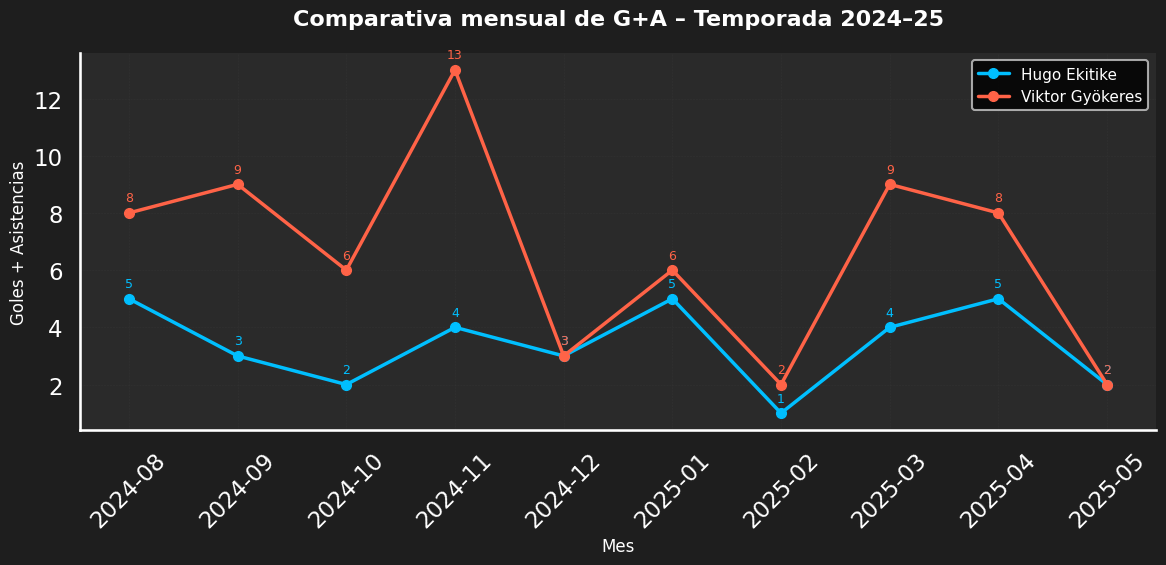

In [11]:
import seaborn as sns

# 🎨 Estilo
plt.style.use("dark_background")
sns.set_context("talk", font_scale=1.0)

# Colores
colors = {
    "Ekitike": "#00BFFF",
    "Gyökeres": "#FF6347"
}

# 📊 Crear figura
fig, ax = plt.subplots(figsize=(12, 6))
fig.patch.set_facecolor('#1e1e1e')
ax.set_facecolor('#2a2a2a')

# ✏️ Título separado
plt.title("Comparativa mensual de G+A – Temporada 2024–25",
          fontsize=16, weight="bold", color="white", pad=20)

# 📈 Líneas con marcadores
ax.plot(monthly_comparison["Month"], monthly_comparison["Ekitike_G+A"],
        label="Hugo Ekitike", color=colors["Ekitike"],
        linewidth=2.5, marker='o', markersize=7)

ax.plot(monthly_comparison["Month"], monthly_comparison["Gyokeres_G+A"],
        label="Viktor Gyökeres", color=colors["Gyökeres"],
        linewidth=2.5, marker='o', markersize=7)

# 🧼 Eliminar grid o hacerlo suave
ax.grid(True, color="#444444", linestyle="--", linewidth=0.4, alpha=0.3)

# Etiquetas encima de los puntos
for i, val in enumerate(monthly_comparison["Ekitike_G+A"]):
    ax.text(i, val + 0.3, str(int(val)), color=colors["Ekitike"],
            ha='center', va='bottom', fontsize=9)

for i, val in enumerate(monthly_comparison["Gyokeres_G+A"]):
    ax.text(i, val + 0.3, str(int(val)), color=colors["Gyökeres"],
            ha='center', va='bottom', fontsize=9)

# 🏷️ Etiquetas
ax.set_xlabel("Mes", fontsize=12, color="white")
ax.set_ylabel("Goles + Asistencias", fontsize=12, color="white")
ax.tick_params(colors="white")
ax.legend(fontsize=11)

# Mejoras finales
sns.despine()
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar
plt.show()
